# 2023-2024 FPL season - exploratory data analysis

## Data import

In [15]:
import sys
sys.path.insert(0, '../../')

import seaborn as sns

from data_ingestion.data_utils import get_github_data

teams = get_github_data('https://github.com/vaastav/Fantasy-Premier-League/blob/master/data/2023-24/teams.csv')
players_end_of_season = get_github_data('https://github.com/vaastav/Fantasy-Premier-League/blob/master/data/2023-24/cleaned_players.csv')
players_end_of_season['name'] = players_end_of_season['first_name'] + ' ' + players_end_of_season['second_name']
players_week_1 = get_github_data('https://github.com/vaastav/Fantasy-Premier-League/blob/master/data/2023-24/gws/gw1.csv')

## Analysis

First, determine the ROI of each player, where player ROI = player total points at end of season / player cost at the start of the season

In [80]:
players_costs_and_points = players_week_1[['name', 'team', 'value']].merge(
    players_end_of_season[['name', 'total_points', 'minutes']],
    on='name',
    how='outer'
)

players_costs_and_points['player_ROI'] = players_costs_and_points['total_points'] / players_costs_and_points['value']
players_costs_and_points.sort_values('player_ROI', ascending=False, inplace=True)
players_costs_and_points

OSError: Cannot save file into a non-existent directory: '../../data/24-25'

At the team level, which team has the best ROI, where team ROI = team total points at end of season / team total cost at the start of the season

Text(0.5, 1.0, 'ROI for each team')

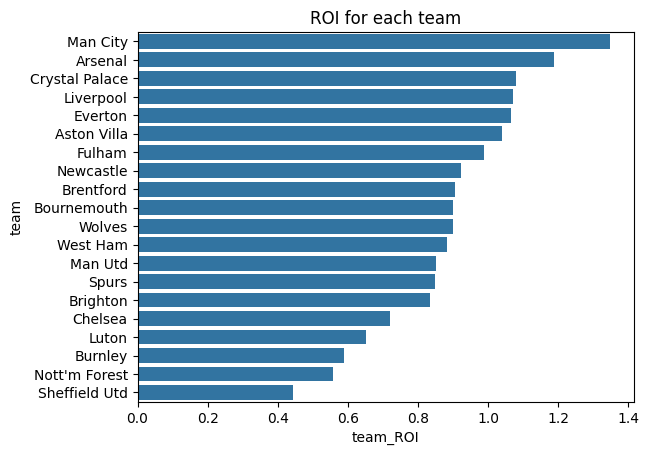

In [76]:
team_costs_and_points = players_costs_and_points.groupby('team')[['value', 'total_points', 'player_ROI']].sum().reset_index()
team_costs_and_points['team_ROI'] = team_costs_and_points['total_points'] / team_costs_and_points['value']
team_costs_and_points.sort_values('team_ROI', ascending=False, inplace=True)

plot = sns.barplot(x='team_ROI', y='team', data=team_costs_and_points)
plot.set_title('ROI for each team')

Based on the above, the best teams to pick from are:
* Man City
* Arsenal
* Crystal Palace
* Liverpool
* Aston Villa
* Fulham
* Newcastle
* Brentford

As well as looking at which teams have a good ROI, we should also consider which teams have a high average number of minutes played, as it's important we don't pick players with a high likelihood of getting benched.

We can multiply the average number of minutes played by the team ROI to get an index score, which helps determine which teams are good to pick from:

Text(0.5, 1.0, 'Player index for each team')

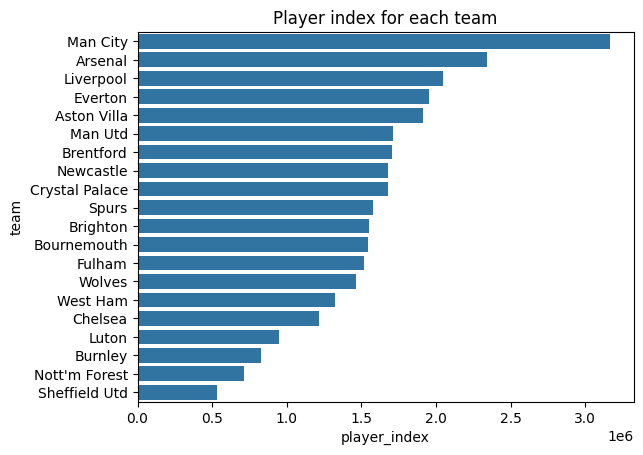

In [77]:
team_costs_and_points = team_costs_and_points.merge(
    players_costs_and_points.groupby('team')['minutes'].mean().reset_index(),
    on='team',
    how='outer'
)

team_costs_and_points['player_index'] = team_costs_and_points['total_points'] * team_costs_and_points['minutes']
team_costs_and_points.sort_values('player_index', ascending=False, inplace=True)
plot = sns.barplot(x='player_index', y='team', data=team_costs_and_points)
plot.set_title('Player index for each team')


Based on the above, the best teams to pick from are:
* Man City
* Arsenal
* Liverpool
* Everton
* Aston Villa
* Man Utd
* Brentford
* Newcastle

Looking at specific players, we can see who had the highest ROI:

Text(0.5, 1.0, 'Top 20 players by ROI')

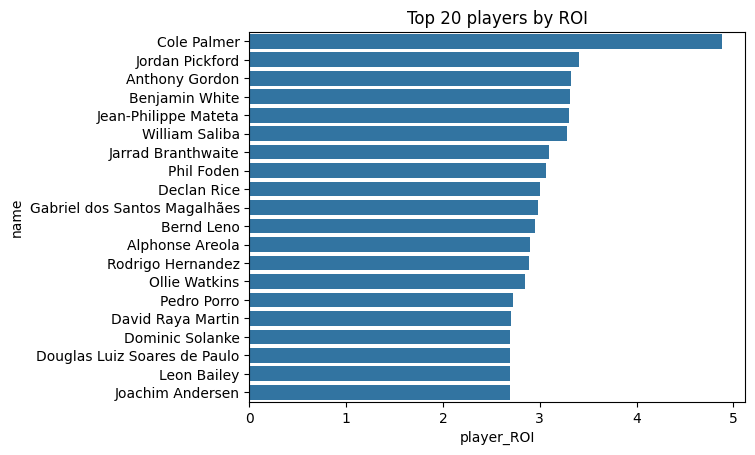

In [78]:
plot = sns.barplot(x='player_ROI', y='name', data=players_costs_and_points[:20])
plot.set_title('Top 20 players by ROI')

Lastly, we can look at the teams for the top 50 players and see how these were spread between teams:

Text(0.5, 1.0, 'Which percentage of top 50 players (ROI) are from each team?')

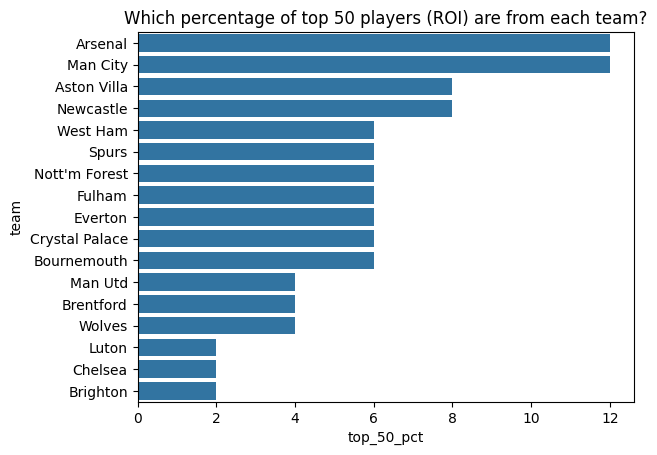

In [79]:
top_50 = players_costs_and_points[:50]
top_50 = top_50.value_counts('team').reset_index()
top_50['top_50_pct'] = top_50['count'] * 2
plot = sns.barplot(x='top_50_pct', y='team', data=top_50)
plot.set_title('Which percentage of top 50 players (ROI) are from each team?')

## Summary

Based on average ROI, the best teams are:
* Man City
* Arsenal
* Crystal Palace
* Liverpool
* Aston Villa
* Fulham
* Newcastle
* Brentford

Based on player index, the best teams are:
* Man City
* Arsenal
* Liverpool
* Everton
* Aston Villa
* Man Utd
* Brentford
* Newcastle

Based on the ROI of the top 50 players, the best teams are:
* Arsenal
* Man City
* Aston Villa
* Newcastle
* West Ham
* Spurs
* Nottingham Forest
* Fulham

Comparing these three lists, it seems like the safest teams to pick from would be:
* Arsenal
* Man City
* Aston Villa
* Newcastle
* Fulham
